In [99]:
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv("test.csv", delimiter=";")

train_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [79]:
print(train_df.shape)

(4521, 17)


In [81]:


train_df = train_df.dropna()

In [33]:
df 

<class 'pandas.core.frame.DataFrame'>


In [83]:
train_df = train_df.rename(columns={'y':'target'})
train_df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [84]:
df = train_df.copy()

## Getting the exact values in the colums in a dataframe

In [85]:
binary_columns = [] #this is the list that contains all the values

for column in df.select_dtypes('object').columns: #this code calls or generates all the columns to be iterated on
    if len(df[column].unique()) == 2: #this syntax generates the len of the values in the columns to satisfy the condition
        binary_columns.append(column) # this syntax is to add or append all the various values into the empty list,i.e binary columns
    
    print(f"Column - {column} ",df[column].unique(), end='\n\n')

Column - job  ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

Column - marital  ['married' 'single' 'divorced']

Column - education  ['primary' 'secondary' 'tertiary' 'unknown']

Column - default  ['no' 'yes']

Column - housing  ['no' 'yes']

Column - loan  ['no' 'yes']

Column - contact  ['cellular' 'unknown' 'telephone']

Column - month  ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

Column - poutcome  ['unknown' 'failure' 'other' 'success']

Column - target  ['no' 'yes']



## convert strings to int

In [86]:

for column in binary_columns:
    df[column] = df[column].map({'yes': 1, 'no': 0}) #this syntax is used to map values
    
df.loc[:, binary_columns]

,default,housing,loan,target
0,0,0,0,0
1,0,1,1,0
2,0,1,0,0
3,0,1,1,0
4,0,1,0,0
...,...,...,...,...
4516,0,1,0,0
4517,1,1,1,0
4518,0,0,0,0
4519,0,0,0,0


## the relations between the columns and target

In [88]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


## Sum of total targets and their resp. ages

In [138]:
age = df.groupby('age').apply(lambda x: (x['target']== 1).sum())


age

age
19    2
20    1
21    1
22    3
23    2
     ..
81    0
83    2
84    1
86    0
87    1
Length: 67, dtype: int64

In [101]:
target_per_age = age['target']

target_per_age

age
19    2
20    1
21    1
22    3
23    2
     ..
81    0
83    2
84    1
86    0
87    1
Name: target, Length: 67, dtype: int64

In [103]:
sum_target = [target for target, df in df.groupby('age')]

print(len(sum_target))

67


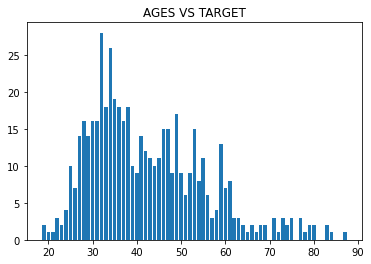

In [139]:
plt.bar(sum_target, target_per_age)
plt.title("AGES VS TARGET")

plt.show()

In [127]:
import numpy as np

temp = np.max(target_per_age)
temp2 = np.min(target_per_age)
print(f"Max target: {temp}, Min target: {temp2}")

Max target: 28, Min target: 0


In [154]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [158]:
# This code generates the sum of the the response or specific values.
#Firstly groupby and use the lambda function to to locate the exact value desired and sum it
# I developed a function for access the sum of the targets that said ye

def yes_target(v):
    return (v['target']== 1).sum()

job_df = df.groupby('job').apply(lambda x: yes_target(x))


job_df

job
admin.            58
blue-collar       69
entrepreneur      15
housemaid         14
management       131
retired           54
self-employed     20
services          38
student           19
technician        83
unemployed        13
unknown            7
dtype: int64

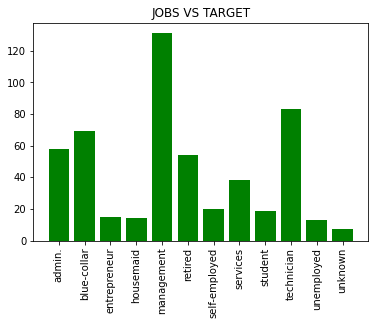

In [141]:
jobs = [job for job, df in df.groupby('job')]

plt.bar(jobs, job_df, color = "green")
plt.xticks(jobs, rotation = 90)
plt.title("JOBS VS TARGET")
plt.show()

In [160]:
#This is the datafram for level of eduation per targets response

edu_df = df.groupby('education').apply(lambda x: yes_target(x))

edu_df

education
primary       64
secondary    245
tertiary     193
unknown       19
dtype: int64

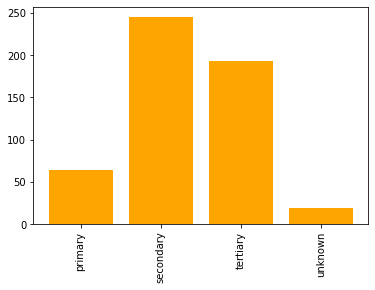

In [161]:
lvl_edu = [level for level, df in df.groupby('education')]

plt.bar(lvl_edu, edu_df, color = 'orange')
plt.xticks(lvl_edu, rotation = 90)
plt.show()

In [164]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
